# Plot cluster map of samples mRNA

Script related to figure s1a

### Aim:
- Plot clustermap of transcriptomes as additional visualisation

In [3]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [5]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys, sep='\t', index_col='Well')

In [6]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


### Define sample colours

In [7]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [8]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [9]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


## Load expression data

In [10]:
data_file = home + "Data/1/TreatmentNaive_log2exp_loess_norm.txt"

data = pd.read_csv(data_file, sep='\t', index_col='Hugo_Symbol')

In [11]:
data.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.124711,3.880633,4.864973,4.167882,4.317845,3.679057,4.092837,4.370571,4.252637,4.174694,...,3.804537,4.416981,4.169014,4.503313,4.146333,4.078398,4.011369,3.845128,3.600927,4.521857
A2BP1,3.960924,4.033715,3.721251,3.916073,4.338194,3.357396,3.872447,3.803388,3.484735,4.427405,...,4.991068,3.799913,4.117883,4.122134,4.221760,3.648326,3.675317,3.546925,3.788279,4.920841
A2M,12.603155,10.859838,12.612923,9.176999,10.548790,11.840776,7.200547,11.835658,11.535547,7.080118,...,9.061598,9.189459,8.844728,7.464440,6.726233,9.265911,10.740486,9.735582,10.781599,8.734304
A2ML1,3.945877,4.000621,3.767932,3.789729,3.543204,3.805520,4.336280,4.031757,4.166018,3.673146,...,4.231174,3.871651,3.287232,3.721093,3.723801,3.884499,3.694111,3.937682,3.600471,3.402861
A4GALT,3.597277,3.863757,4.051844,4.113169,3.975144,3.991293,5.439960,4.696177,4.171788,4.041633,...,4.183089,4.699729,4.019537,3.739865,4.591953,4.997860,4.099630,5.001239,4.714710,4.145119


### Select 100 most variable genes

In [12]:
most_var_genes = data.mad(axis="columns").sort_values(ascending=False).head(n=100).index

In [13]:
data = data.loc[most_var_genes]

len(data)

100

## Perform sample correlation clustermap

In [14]:
data_corr = data.corr()

### Add binary tumour cellularity info

In [15]:
median_tumcell = sample_labels['TumourCellularity_WES'].median()
sample_labels['TumCell_WES_bin'] = sample_labels['TumourCellularity_WES'] > median_tumcell

In [16]:
sample_labels['TumCell_WES_bin'].replace([True,False],
                                         ['k','w'],
                                         inplace=True)

### Plot

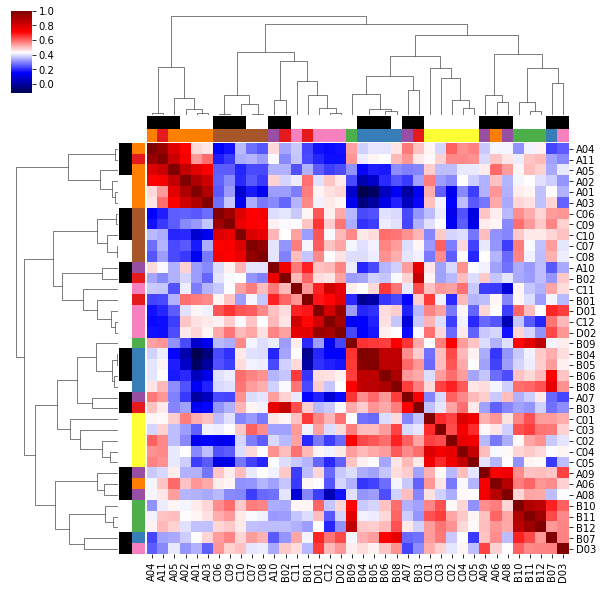

In [17]:
g = sns.clustermap(data_corr,
                   cmap='seismic',
                   metric='correlation',
                   row_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']],
                   col_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']],
                   linewidths=0.0, rasterized=True
                  )

In [18]:
data_corr.shape

(38, 38)

### Save plot

In [19]:
ls ../../Figures/supplementary/1/

OVCT_Fig_s1.pdf  OVCT_Fig_s1.png  README.md        panels/


In [20]:
FILE = "../../Figures/supplementary/1/panels/s1a_TreatmentNaive_mRNA_clustermap.pdf"

g.savefig(FILE, bbox='tight')

# End script

### Check MYC TFs levels pure vs impure

In [10]:
data2 = data.loc[["MYC", "MYCN"]]

In [11]:
data2

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
MYC,4.843392,6.038506,6.965184,9.935970,6.268605,8.039895,8.469310,8.484019,9.243982,4.002891,...,6.435030,7.453884,8.404310,5.842657,7.605144,8.525180,7.788009,6.538921,7.035180,7.765808
MYCN,9.062404,8.220615,8.304376,7.638647,8.176380,7.985389,6.318084,7.498702,7.870420,9.493306,...,5.524765,6.500060,6.864434,6.047344,5.111534,5.388277,6.265220,7.038426,6.486038,7.127229


In [15]:
MYC_DF = pd.concat([
    sample_labels['TumCell_WES_bin'],
    data2.T],
    axis="columns"
)
    

In [16]:
MYC_DF.head()

,TumCell_WES_bin,MYC,MYCN
Well,,,
A01,w,4.843392,9.062404
A02,w,6.038506,8.220615
A03,w,6.965184,8.304376
A04,k,9.935970,7.638647
A05,k,6.268605,8.176380


In [17]:
MYC_DF.shape

(38, 3)

In [18]:
MYC_DF["TumCell_WES_bin"].replace({"w":"impure", "k":"pure"}, inplace=True)

In [19]:
MYC_DF["MYCN"].min()

4.49795399684967

In [20]:
MYC_DF.dropna(inplace=True)

In [21]:
MYC_DF.index

Index(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10',
       'A11', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09',
       'B10', 'B11', 'B12', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07',
       'C08', 'C09', 'C10', 'C11', 'C12', 'D01', 'D02', 'D03'],
      dtype='object', name='Well')

In [22]:
MYC_DF.drop(['B12', 'C08'], inplace=True)

In [23]:
'B12', 'C08'

('B12', 'C08')

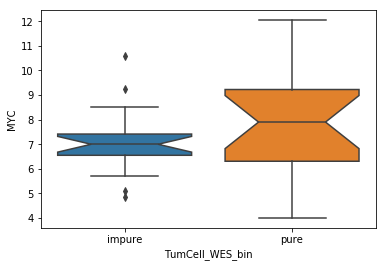

In [24]:
bx = sns.boxplot(data=MYC_DF,
            x="TumCell_WES_bin",
            y="MYC",
           notch=True)

In [25]:
len(MYC_DF[MYC_DF["TumCell_WES_bin"]=="impure"])

18

In [26]:
bx = bx.get_figure()

In [ ]:
bx.savefig("../2.Plots/MYC_TumorPurity.pdf")

In [ ]:
bx = sns.boxplot(data=MYC_DF,
            x="TumCell_WES_bin",
            y="MYCN",
           notch=True)

In [ ]:
bx = bx.get_figure()
bx.savefig("../2.Plots/MYCN_TumorPurity.pdf")

In [29]:
MYC_DF_scatter = pd.concat([
    sample_labels['TumourCellularity_WES'],
    data2.T],
    axis="columns"
)

MYC_DF_scatter.dropna(inplace=True)

MYC_DF_scatter.head()

,TumourCellularity_WES,MYC,MYCN
Well,,,
A01,0.5973,4.843392,9.062404
A02,0.5065,6.038506,8.220615
A03,0.4551,6.965184,8.304376
A04,0.6496,9.935970,7.638647
A05,0.6706,6.268605,8.176380


In [30]:
MYC_DF_scatter.shape

(36, 3)

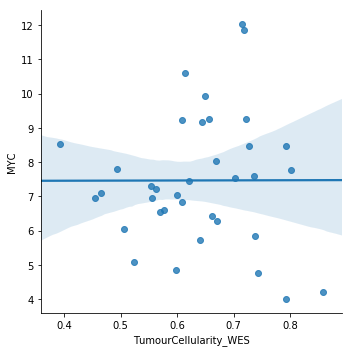

In [31]:
ax = sns.lmplot(data=MYC_DF_scatter, x="TumourCellularity_WES", y="MYC")

In [ ]:
set(MYC_DF.index) ^ set(MYC_DF_scatter.index)

In [ ]:
ax.savefig("../2.Plots/MYC_TumorPurity_scatter.pdf")

In [ ]:
ax = sns.lmplot(data=MYC_DF_scatter, x="TumourCellularity_WES", y="MYCN")

In [ ]:
ax.savefig("../2.Plots/MYCN_TumorPurity_scatter.pdf")

In [33]:
MYC_DF_scatter.head()

,TumourCellularity_WES,MYC,MYCN
Well,,,
A01,0.5973,4.843392,9.062404
A02,0.5065,6.038506,8.220615
A03,0.4551,6.965184,8.304376
A04,0.6496,9.935970,7.638647
A05,0.6706,6.268605,8.176380


In [36]:
from scipy.stats import spearmanr, kendalltau, ttest_ind, levene, shapiro
import scipy.stats

In [38]:
x = MYC_DF_scatter["TumourCellularity_WES"]

correlations = []
for myc in MYC_DF_scatter:
    
    if myc != "TumourCellularity_WES":
    
        y = MYC_DF_scatter[myc]
    
        print(myc+"\n")

        n1 = scipy.stats.shapiro(x)[1]
        n2 = scipy.stats.shapiro(y)[1]

        n3 = scipy.stats.normaltest(x)[1]
        n4 = scipy.stats.normaltest(y)[1]

        n5 = scipy.stats.anderson(x)
        n6 = scipy.stats.anderson(y)

        if min([n1,n2,n3,n4]) < 0.05: # not normal
            
            print("NOT normal")

            h1 = scipy.stats.levene(x, y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
                #print(h1)
            else:
                print("HOMOscedastic\n")

        else:
            
            print("Normal")

            h1 = scipy.stats.bartlett(x,y)[1]
            
            if h1 < 0.05:
                print("HETEROscedastic\n")
            else:
                print("HOMOscedastic\n")

        if min([n1,n2,n3,n4,h1]) < 0.05:

            print("KENDALL")

            print(scipy.stats.kendalltau(x,y)[1])
            
            cor, p_val = scipy.stats.kendalltau(x,y)

        else:

            print("anderson")

            print(n5[0], n5[1])
            print(n6[0], n6[1])
            print("\n")

            print("PEARSON")
            print(scipy.stats.pearsonr(x,y)[1])
            
            cor, p_val = scipy.stats.pearsonr(x,y)
                
            print("\n")
            
        correlations.append([myc,cor,p_val])

MYC

Normal
HETEROscedastic

KENDALL
0.8487665010168555
MYCN

Normal
HETEROscedastic

KENDALL
0.7029175632453668


In [39]:
correlations

[['MYC', 0.022222222222222227, 0.8487665010168555],
 ['MYCN', 0.04444444444444445, 0.7029175632453668]]

In [46]:
scipy.stats.shapiro(MYC_DF[MYC_DF["TumCell_WES_bin"]=="impure"]["MYC"].values)

# Looks normal

(0.9358838200569153, 0.24609717726707458)

In [45]:
scipy.stats.shapiro(MYC_DF[MYC_DF["TumCell_WES_bin"]=="pure"]["MYC"].values)

# Looks normal

(0.9647953510284424, 0.6960864067077637)

In [44]:
scipy.stats.normaltest(MYC_DF[MYC_DF["TumCell_WES_bin"]=="pure"]["MYC"].values)

# looks normal

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.043764898180800704, pvalue=0.9783552348396798)

In [47]:
scipy.stats.normaltest(MYC_DF[MYC_DF["TumCell_WES_bin"]=="impure"]["MYC"].values)

# looks normal

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=4.3956747471166295, pvalue=0.11104304349990697)

In [48]:
scipy.stats.bartlett(
    MYC_DF[MYC_DF["TumCell_WES_bin"]=="impure"]["MYC"].values,
    MYC_DF[MYC_DF["TumCell_WES_bin"]=="pure"]["MYC"].values
)

# heteroscedasti

BartlettResult(statistic=4.176877707660865, pvalue=0.04097913006013317)

In [49]:
ttest_ind(
    MYC_DF[MYC_DF["TumCell_WES_bin"]=="impure"]["MYC"].values,
    MYC_DF[MYC_DF["TumCell_WES_bin"]=="pure"]["MYC"].values,
    equal_var=False
)

Ttest_indResult(statistic=-1.1505214945577384, pvalue=0.25973342674886485)

In [ ]:
MYC_DF[MYC_DF["TumCell_WES_bin"]=="impure"]["MYC"]

In [ ]:
### HLA stuff

In [ ]:
import fnmatch

In [ ]:
data.head()

In [ ]:
HLAs = data[data.index.str.contains('HLA', regex=False)]

In [ ]:
HLAs_corr = HLAs.corr()

In [ ]:
g = sns.clustermap(HLAs_corr,
                   cmap='seismic',
                   metric='correlation',
                   row_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']],
                   col_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']])

In [ ]:
g = sns.clustermap(HLAs,
                   cmap='seismic',
                   metric='correlation',
                   col_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']])

In [ ]:
g = sns.clustermap(HLAs,
                   cmap='seismic',
                   metric='correlation',
                   col_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']],
                  z_score="rows")

In [ ]:
HLAsABC = data[data.index.str.contains('HLA-A|HLA-B|HLA-C', regex=True)]

In [ ]:
HLAsABC_corr = HLAsABC.corr()

In [ ]:
g = sns.clustermap(HLAsABC_corr,
                   cmap='seismic',
                   metric='correlation',
                   row_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']],
                   col_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']])

In [ ]:
g = sns.clustermap(HLAsABC,
                   cmap='seismic',
                   metric='correlation',
                   col_colors=[sample_labels['TumCell_WES_bin'],
                               sample_labels['Colour']])

In [ ]:
g.savefig('../2.Plots/x_HLA-ABC_expression.pdf',
          bbox='tight')